In [2]:
from utilidades.Lector_Futuro import Lector_Futuro
from utilidades.Lector import Lector
import sys

In [3]:
%pip install -U scikit-learn scipy matplotlib

Requirement already up-to-date: scikit-learn in /home/vscode/.local/lib/python3.8/site-packages (1.1.3)
Requirement already up-to-date: scipy in /home/vscode/.local/lib/python3.8/site-packages (1.9.3)
Requirement already up-to-date: matplotlib in /home/vscode/.local/lib/python3.8/site-packages (3.6.2)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Utilerias
import os
import math
import random
import datetime

# Matrices y DataFrame
import numpy as np
import pandas as pd

# MLP
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [62]:
hora = '09:00:00'

# Lee los datos del directorio
l = Lector_Futuro('data/encb-90-fusionado.csv')
X, Y = l.get_data(hora, pasosPasado=1, pasosFuturo=1, excluirColumnasX=[], agregarHoraLocalY=True, show=False)
      
# El conjunto de datos se filtra a un intervalo especifico
lp = Lector('data/encb-90-fusionado.csv')
fecha_cercana = "2022-10-03 " + hora
fecha_lejana = "2022-08-14 " + hora
X_out, Y_out = lp.intervalo(X, Y, fecha_cercana, fecha_lejana)
X = X_out
Y = Y_out

In [63]:
temp = Y['Temperatura del Aire (�C) t']
hora = Y['Hora Local']

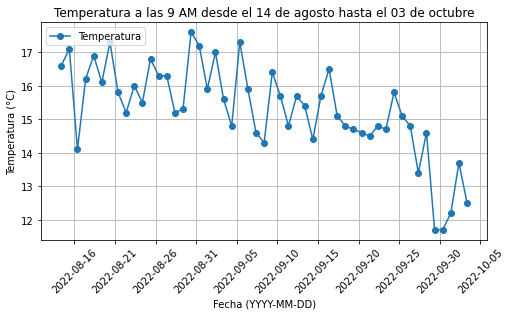

In [65]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
# Muestra la grafica con las predicciones de dias futuros
fig1 = plt.figure()
axs1 = fig1.add_subplot(1, 1, 1)
axs1.set_xlabel("Fecha (YYYY-MM-DD)")
axs1.set_ylabel("Temperatura (°C)")
axs1.plot(hora,temp, '-o', label='Temperatura')
axs1.legend(loc="upper left")
axs1.set_title('Temperatura a las 9 AM desde el 14 de agosto hasta el 03 de octubre')
fig1.set_size_inches(8,4)
plt.grid()
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().tick_params(axis='x', labelrotation=45)
fig1.savefig('redes-exp3-pred.png')

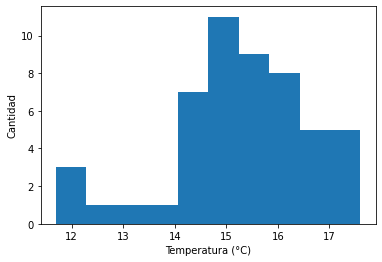

In [66]:
(counts, bins, patches) = plt.hist(temp)
plt.xlabel("Temperatura (°C)")
plt.ylabel("Cantidad")
plt.show()

In [67]:
X

,Direcci�n del Viento (grados) t-1D,Direcci�n de r�faga (grados) t-1D,Rapidez de viento (km/h) t-1D,Rapidez de r�faga (km/h) t-1D,Temperatura del Aire (�C) t-1D,Humedad relativa (%) t-1D,Presi�n Atmosf�rica (hpa) t-1D,Precipitaci�n (mm) t-1D,Radiaci�n Solar (W/m�) t-1D
39,263.0,203.0,3.2,9.1,13.7,92,781.4,0.0,297.0
40,333.0,19.0,2.8,6.8,12.2,99,779.5,0.0,294.0
41,242.0,240.0,5.0,8.5,11.7,93,781.1,0.0,74.0
42,23.0,23.0,10.8,16.0,11.7,99,784.1,0.0,42.0
43,311.0,341.0,11.1,20.0,14.6,100,783.0,0.0,237.0
44,328.0,318.0,10.6,14.9,13.4,98,781.5,0.0,201.0
45,21.0,352.0,13.1,20.0,14.8,100,779.7,0.0,124.0
46,319.0,311.0,4.2,9.7,15.1,94,780.2,0.0,120.0
47,301.0,318.0,6.2,9.1,15.8,100,781.9,0.0,168.0
48,326.0,328.0,9.4,16.6,14.7,98,781.2,0.0,84.0


In [68]:
Y

,Temperatura del Aire (�C) t,Hora Local
39,12.5,2022-10-03 09:00:00
40,13.7,2022-10-02 09:00:00
41,12.2,2022-10-01 09:00:00
42,11.7,2022-09-30 09:00:00
43,11.7,2022-09-29 09:00:00
44,14.6,2022-09-28 09:00:00
45,13.4,2022-09-27 09:00:00
46,14.8,2022-09-26 09:00:00
47,15.1,2022-09-25 09:00:00
48,15.8,2022-09-24 09:00:00
